# Assignment 1
Link found here: https://www.coursera.org/learn/exploratory-data-analysis/peer/ylVFo/course-project-1

## Pulling the data

In [1]:
download.file("https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip", "household_power_consumption.zip")

In [2]:
unzip("household_power_consumption.zip")

The following descriptions of the 9 variables in the dataset are taken from the UCI web site:

* Date: Date in format dd/mm/yyyy
* Time: time in format hh:mm:ss
* Global_active_power: household global minute-averaged active power (in kilowatt)
* Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* Voltage: minute-averaged voltage (in volt)
* Global_intensity: household global minute-averaged current intensity (in ampere)
* Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* Sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
list.files()

[1] "Assignment 1.ipynb"              "Graphics.ipynb"                 
[3] "household_power_consumption.txt" "household_power_consumption.zip"

All of the data is held in the big chunky `household_power_consumption.txt`.

## Explore the data

In [1]:
library(data.table)

In [8]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
power_consumption <- fread("household_power_consumption.txt", header = TRUE, sep=';', nrows = 10)

Note the use of semi-colon separators. Always pays to read the docs!
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [3]:
power_consumption

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17
16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0,2,17
16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0,1,17
16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0,1,17
16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0,1,17
16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0,2,16


In [7]:
power_consumption <- fread("household_power_consumption.txt", header = TRUE, sep = ';', na.strings = "?")

Read 2075259 rows and 9 (of 9) columns from 0.124 GB file in 00:00:03


In [115]:
power_consumption <- mutate(power_consumption, datetime = as.POSIXct(paste(Date, " " ,Time), format="%d/%m/%Y %H:%M:%S" ))

In [116]:
class(power_consumption$datetime)

[1] "POSIXct" "POSIXt"

In [118]:
head(power_consumption)

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17,2006-12-16 17:24:00
16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16,2006-12-16 17:25:00
16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17,2006-12-16 17:26:00
16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17,2006-12-16 17:27:00
16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17,2006-12-16 17:28:00
16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0,2,17,2006-12-16 17:29:00


## Subset the data

In [119]:
start_date <- strptime("2007-02-01", "%Y-%m-%d")
end_date <- strftime("2007-02-03", "%Y-%m-%d")

In [120]:
power_consumption_subset <- filter(power_consumption, (start_date <= datetime) & (datetime < end_date))

In [121]:
head(power_consumption_subset)

Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0,0,0,2007-02-01 00:00:00
1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0,0,0,2007-02-01 00:01:00
1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0,0,0,2007-02-01 00:02:00
1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0,0,0,2007-02-01 00:03:00
1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0,0,0,2007-02-01 00:04:00
1/2/2007,00:05:00,0.320,0.126,242.29,1.4,0,0,0,2007-02-01 00:05:00


In [122]:
tail(power_consumption_subset)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
2875,2/2/2007,23:54:00,3.696,0.226,240.71,15.2,0,1,17,2007-02-02 23:54:00
2876,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0,1,18,2007-02-02 23:55:00
2877,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0,2,18,2007-02-02 23:56:00
2878,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0,1,18,2007-02-02 23:57:00
2879,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0,1,17,2007-02-02 23:58:00
2880,2/2/2007,23:59:00,3.680,0.224,240.37,15.2,0,2,18,2007-02-02 23:59:00


## Generate Plot1

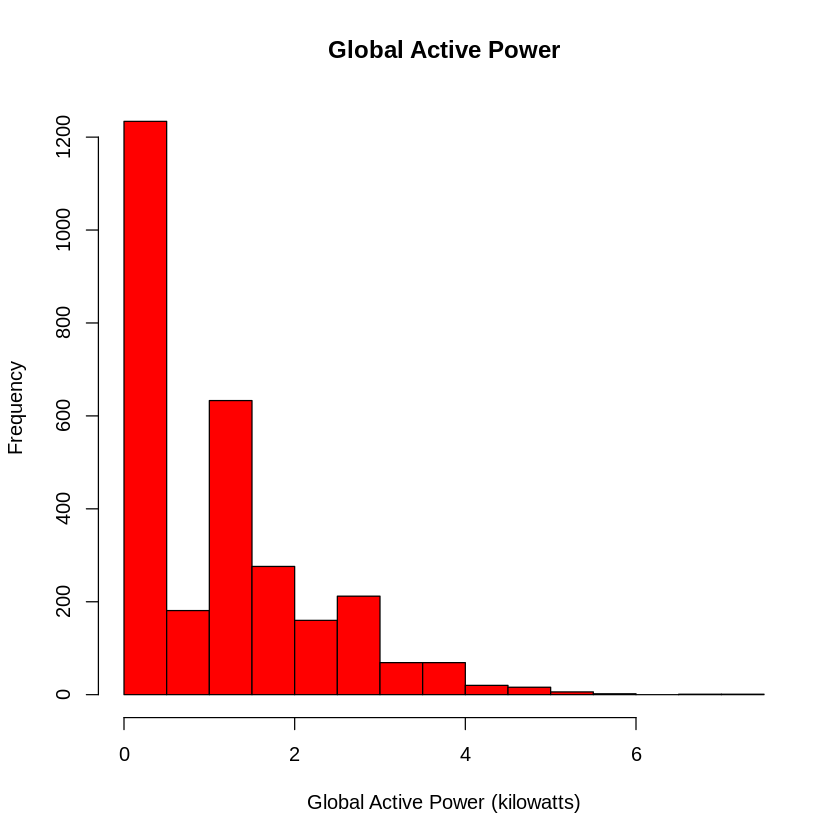

In [130]:
hist(power_consumption_subset$Global_active_power, breaks=11, col='red',
     xlab = "Global Active Power (kilowatts)",
     main = "Global Active Power")

In [131]:
if (file.exists("Plot1.png")) {
    file.remove("Plot1.png")
}
png("Plot1.png", width=480, height=480, units="px")
hist(power_consumption_subset$Global_active_power, breaks=11, col='red',
     xlab = "Global Active Power (kilowatts)",
     main = "Global Active Power")
dev.off()

[1] TRUE

png 
  2

## Generate Plot2

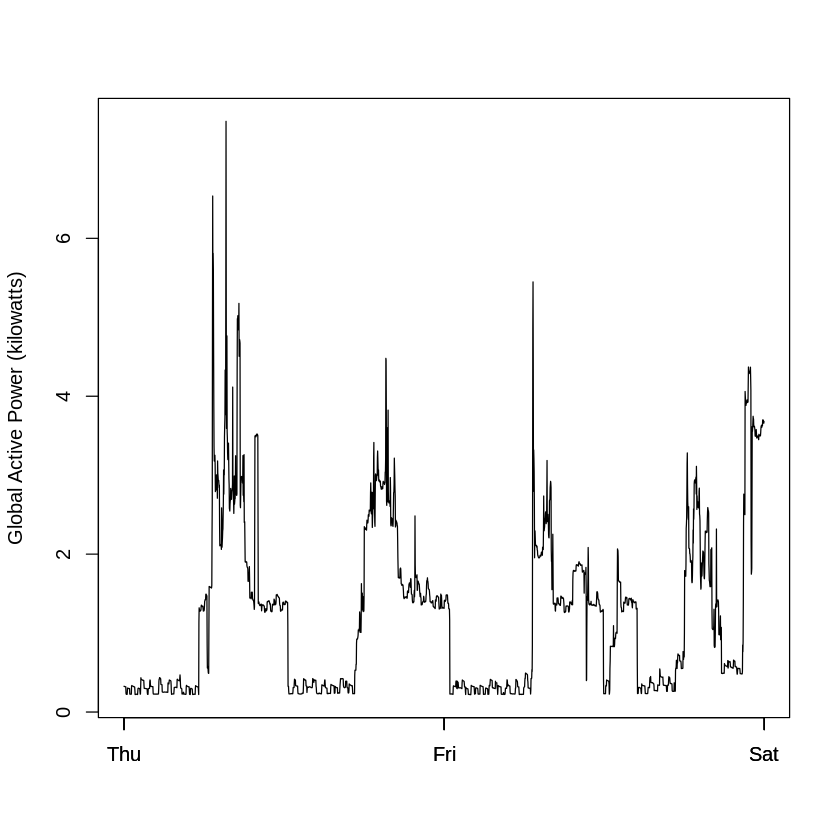

In [129]:
plot(power_consumption_subset$datetime, power_consumption_subset$Global_active_power, type='l',
    ylab = "Global Active Power (kilowatts)",
    xlab = "")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

In [136]:
if (file.exists("Plot2.png")) {
    file.remove("Plot2.png")
}

png("Plot2.png", width=480, height=480, units="px")
plot(power_consumption_subset$datetime, power_consumption_subset$Global_active_power, type='l',
    ylab = "Global Active Power (kilowatts)",
    xlab = "")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")
dev.off()

[1] TRUE

png 
  2

## Generate Plot3

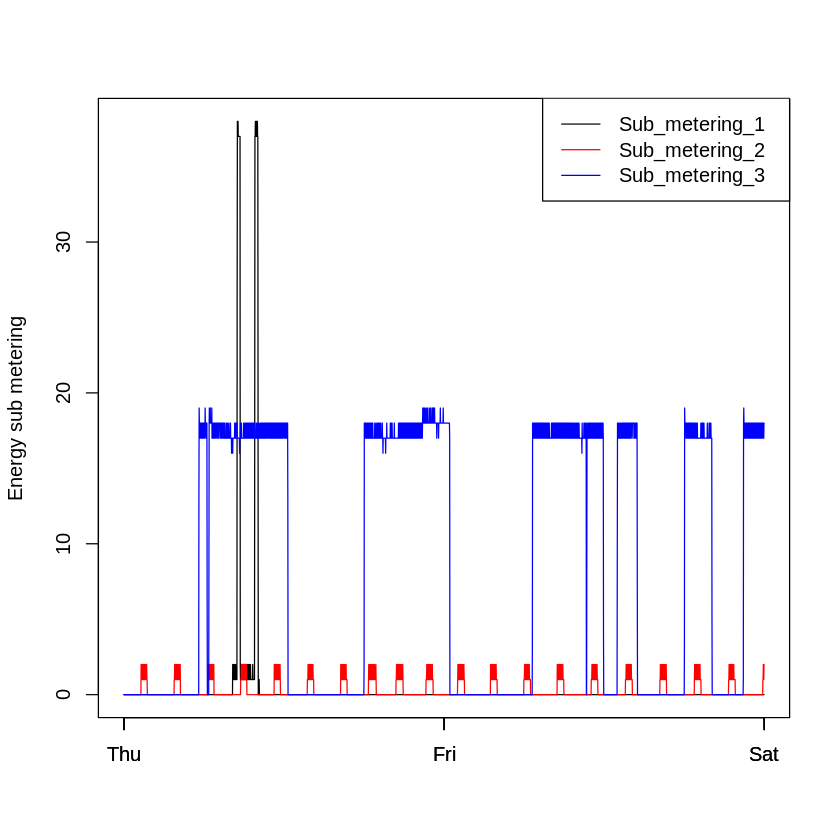

In [154]:
plot(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_1, col="black",
     type = 'l',
     ylab = "Energy sub metering",
     xlab = "")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_2, col="red", type="l")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_3, col="blue", type="l")
legend("topright", 
       legend=c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), 
       lty="solid", 
       col=c("black", "red", "blue"))
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

In [155]:
if (file.exists("Plot3.png")) {
    file.remove("Plot3.png")
}
png("Plot3.png", width=480, height=480, units="px")

plot(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_1, col="black",
     type = 'l',
     ylab = "Energy sub metering",
     xlab = "")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_2, col="red", type="l")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_3, col="blue", type="l")
legend("topright", 
       legend=c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), 
       lty="solid", 
       col=c("black", "red", "blue"))
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

dev.off()

png 
  2

## Generate Plot4

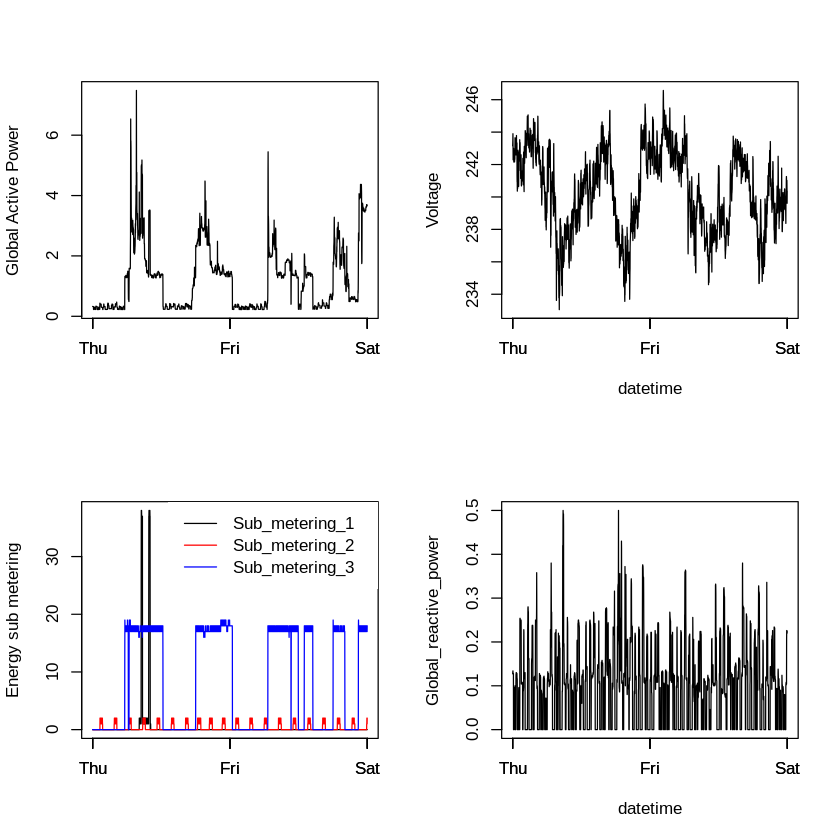

In [160]:
par(mfrow=c(2,2))

# Plot 1
plot(power_consumption_subset$datetime, power_consumption_subset$Global_active_power, type='l',
    ylab = "Global Active Power",
    xlab = "")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 2
plot(power_consumption_subset$datetime, power_consumption_subset$Voltage, type='l',
    ylab = "Voltage",
    xlab = "datetime")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 3
plot(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_1, col="black",
     type = 'l',
     ylab = "Energy sub metering",
     xlab = "")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_2, col="red", type="l")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_3, col="blue", type="l")
legend("topright", 
       legend=c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), 
       lty="solid", 
       col=c("black", "red", "blue"),
       box.lty='blank'
      )
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 4
plot(power_consumption_subset$datetime, power_consumption_subset$Global_reactive_power, type='l',
    ylab = "Global_reactive_power",
    xlab = "datetime")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

In [161]:
if (file.exists("Plot4.png")) {
    file.remove("Plot4.png")
}
png("Plot4.png", width=480, height=480, units="px")

par(mfrow=c(2,2))

# Plot 1
plot(power_consumption_subset$datetime, power_consumption_subset$Global_active_power, type='l',
    ylab = "Global Active Power",
    xlab = "")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 2
plot(power_consumption_subset$datetime, power_consumption_subset$Voltage, type='l',
    ylab = "Voltage",
    xlab = "datetime")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 3
plot(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_1, col="black",
     type = 'l',
     ylab = "Energy sub metering",
     xlab = "")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_2, col="red", type="l")
lines(power_consumption_subset$datetime, power_consumption_subset$Sub_metering_3, col="blue", type="l")
legend("topright", 
       legend=c("Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), 
       lty="solid", 
       col=c("black", "red", "blue"),
       box.lty='blank'
      )
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

# Plot 4
plot(power_consumption_subset$datetime, power_consumption_subset$Global_reactive_power, type='l',
    ylab = "Global_reactive_power",
    xlab = "datetime")
axis.POSIXct(1, power_consumption_subset$datetime, format = "%a")

dev.off()

png 
  2